In [1995]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', None)
%matplotlib inline
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler
import geopandas

In [2361]:
data = pd.read_csv('data/ACSST5Y2018.S0101_data_with_overlays_2020-09-09T171138.csv', low_memory=False, header=1)

In [2362]:
# Delete margin of error columns
data = data[data.columns.drop(list(data.filter(regex='^Margin')))]

In [2363]:
# Replace (X) with NaN values
data = data.replace({'(X)': np.nan})

In [2364]:
# Drop estimate percent total population because it doesn't make sense
data.drop(['Estimate!!Percent!!Total population'], axis=1, inplace=True)

In [2365]:
# Fill in percentage male total population
data['Estimate!!Percent Male!!Total population'] = data['Estimate!!Male!!Total population']/data['Estimate!!Total!!Total population']

In [2366]:
# Fill in percentage female total population
data['Estimate!!Percent Female!!Total population'] = data['Estimate!!Female!!Total population']/data['Estimate!!Total!!Total population']



In [2367]:
# Null data points
data.isnull().values.sum()

1093602

In [2368]:
# Total data points
data.shape[0] * data.shape[1]

7584480

In [2369]:
# Delete percent allocated columns
data.drop(['Estimate!!Female!!PERCENT ALLOCATED!!Sex'], axis=1, inplace=True)
data.drop(['Estimate!!Percent Female!!PERCENT ALLOCATED!!Sex'], axis=1, inplace=True)
data.drop(['Estimate!!Total!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Percent!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Male!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Percent Male!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Female!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Percent Female!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)

In [2370]:
data.drop('Estimate!!Total!!PERCENT ALLOCATED!!Sex', axis=1, inplace=True)

In [2371]:
data['zip'] = data['Geographic Area Name'].str[-5:]


In [2372]:
data['zip'].nunique()

33120

### Density

In [2373]:
uszips = pd.read_csv('data/uszips.csv')

In [2374]:
density = uszips[['zip', 'density']]

In [2375]:
density['zip'] = density['zip'].astype(str)

In [2376]:
density['zip']=density['zip'].str.rjust(5, "0")

In [2377]:
density.set_index('zip', inplace=True)

#### Demographic characteristics

In [2378]:
dem_char = pd.read_csv('data/ACSST5Y2018.S2502_data_with_overlays_2020-09-08T190727.csv', low_memory=False, header=1)

In [2379]:
dem_char['zip'] = dem_char['Geographic Area Name'].str[-5:]

In [2380]:
# Delete margin of error columns
dem_char = dem_char[dem_char.columns.drop(list(dem_char.filter(regex='^Margin')))]

#### Worker class - NOT YET INCLUDED

In [2381]:
worker_class = pd.read_csv('data/ACSST5Y2018.S2409_data_with_overlays_2020-09-17T001304.csv', low_memory=False, header=1)

In [2382]:
worker_class['zip'] = worker_class['Geographic Area Name'].str[-5:]

In [2383]:
# Delete margin of error columns
worker_class = worker_class[worker_class.columns.drop(list(worker_class.filter(regex='^Margin')))]

#### Real estate

In [2384]:
real_estate = pd.read_excel('data/HPI_AT_BDL_ZIP5.xlsx')

In [2385]:
# Drop first 5 rows
real_estate = real_estate.iloc[5:]

In [2386]:
# Make first row the header
real_estate.rename(columns=real_estate.iloc[0], inplace = True)

In [2387]:
# Delete repeating row
real_estate = real_estate.iloc[1:]

In [2388]:
# Select rows that are Year 2019
real_estate_2019 = real_estate[real_estate['Year']=='2019']

### Physical Housing Characteristics

In [2389]:
housing_char = pd.read_csv('data/Physical_Housing_Characteristics.csv', low_memory=False, header=1)

In [2390]:
housing_char['zip'] = housing_char['Geographic Area Name'].str[-5:]

In [2391]:
# Delete margin of error columns
housing_char = housing_char[housing_char.columns.drop(list(housing_char.filter(regex='^Margin')))]

### Veteran Status


In [2392]:
veteran = pd.read_csv('data/ACSST5Y2018.S2101_data_with_overlays_2020-09-14T113935.csv', low_memory=False, header=1)

In [2393]:
veteran['zip'] = veteran['Geographic Area Name'].str[-5:]

In [2394]:
# Delete margin of error columns
veteran = veteran[veteran.columns.drop(list(veteran.filter(regex='^Margin')))]

### Transportation

In [2395]:
transportation = pd.read_csv('data/ACSST5Y2018.S0801_data_with_overlays_2020-09-05T010054.csv', low_memory=False, header=1)

In [2396]:
transportation['zip'] = transportation['Geographic Area Name'].str[-5:]

In [2397]:
# Delete margin of error columns
transportation = transportation[transportation.columns.drop(list(transportation.filter(regex='MOE')))]

### Housing and Income


In [2398]:
financial_char = pd.read_csv('data/ACSST5Y2018.S2503_data_with_overlays_2020-09-08T115524.csv', low_memory=False, header=1)

In [2399]:
financial_char['zip'] = financial_char['Geographic Area Name'].str[-5:]

In [2400]:
# Delete margin of error columns
financial_char = financial_char[financial_char.columns.drop(list(financial_char.filter(regex='^Margin')))]

### Education

In [2401]:
education = pd.read_csv('data/Education.csv', low_memory=False, header=1)

In [2402]:
education['zip'] = education['Geographic Area Name'].str[-5:]

In [2403]:
# Delete margin of error columns
education = education[education.columns.drop(list(education.filter(regex='^Margin')))]

### Employment


In [2587]:
employment = pd.read_csv('data/ACSST5Y2018.S2302_data_with_overlays_2020-09-08T190000.csv', low_memory=False, header=1)

In [2588]:
# zip column
employment['zip'] = employment['Geographic Area Name'].str[-5:]

In [2589]:
# Delete margin of error columns
employment = employment[employment.columns.drop(list(employment.filter(regex='^Margin')))]

### Marital status


In [2407]:
marital = pd.read_csv('data/ACSST5Y2018.S1201_data_with_overlays_2020-09-14T121102.csv', low_memory=False, header=1)

In [2408]:
# zip column
marital['zip'] = marital['Geographic Area Name'].str[-5:]

In [2409]:
# Delete margin of error columns
marital = marital[marital.columns.drop(list(marital.filter(regex='^Margin')))]

### Language spoken at home

In [2410]:
language = pd.read_csv('data/ACSST5Y2018.S1601_data_with_overlays_2020-09-14T123248.csv', low_memory=False, header=1)

In [2411]:
# zip column
language['zip'] = language['Geographic Area Name'].str[-5:]

In [2412]:
# Delete margin of error columns
language = language[language.columns.drop(list(language.filter(regex='^Margin')))]

In [2413]:
# Drop Estimated Percent Pop 5 Years and over - no data
language.drop('Estimate!!Percent!!Population 5 years and over', axis=1, inplace=True)

### Drop id and Geographic Area Name

In [2414]:
dem_char.drop('id', axis=1, inplace=True)
dem_char.drop('Geographic Area Name', axis=1, inplace=True)
housing_char.drop('id', axis=1, inplace=True)
housing_char.drop('Geographic Area Name', axis=1, inplace=True)
worker_class.drop('id', axis=1, inplace=True)
worker_class.drop('Geographic Area Name', axis=1, inplace=True)
employment.drop('id', axis=1, inplace=True)
employment.drop('Geographic Area Name', axis=1, inplace=True)
education.drop('id', axis=1, inplace=True)
education.drop('Geographic Area Name', axis=1, inplace=True)
financial_char.drop('id', axis=1, inplace=True)
financial_char.drop('Geographic Area Name', axis=1, inplace=True)
language.drop('id', axis=1, inplace=True)
language.drop('Geographic Area Name', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data.drop('Geographic Area Name', axis=1, inplace=True)
veteran.drop('id', axis=1, inplace=True)
veteran.drop('Geographic Area Name', axis=1, inplace=True)
marital.drop('id', axis=1, inplace=True)
marital.drop('Geographic Area Name', axis=1, inplace=True)
transportation.drop('id', axis=1, inplace=True)
transportation.drop('Geographic Area Name', axis=1, inplace=True)

In [2415]:
# Make zip column the index
dem_char.set_index('zip', inplace=True)
housing_char.set_index('zip', inplace=True)
worker_class.set_index('zip', inplace=True)
employment.set_index('zip', inplace=True)
education.set_index('zip', inplace=True)
financial_char.set_index('zip', inplace=True)
language.set_index('zip', inplace=True)
data.set_index('zip', inplace=True)
marital.set_index('zip', inplace=True)
veteran.set_index('zip', inplace=True)
transportation.set_index('zip', inplace=True)

In [2416]:
# Drop empty columns- marital
marital.drop('Estimate!!Now married (except separated)!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)
marital.drop('Estimate!!Widowed!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)
marital.drop('Estimate!!Divorced!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)
marital.drop('Estimate!!Separated!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)
marital.drop('Estimate!!Never married!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)

In [2417]:
# Delete marital columns with (X)
marital = marital.loc[:, ~(marital == '(X)').any()]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [2418]:
# Delete veterans columns with (X)
veteran = veteran.loc[:, ~(veteran == '(X)').any()]

In [2419]:
# Delete education columns with (X)
education = education.loc[:, ~(education == '(X)').any()]

In [2420]:
# Delete financial_char columns with (X)
financial_char = financial_char.loc[:, ~(financial_char == '(X)').any()]

In [2421]:
data = data.loc[:, ~(data == '(X)').any()]

In [2592]:
# Delete employment columns with (X)
employment = employment.loc[:, ~(employment == '(X)').any()]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [2423]:
# Delete language columns with (X)
language = language.loc[:, ~(language == '(X)').any()]

In [2424]:
# Delete transportation columns with (X)
transportation = transportation.loc[:, ~(transportation == '(X)').any()]

Most useful features idea:
1) Household income
2) Percent of children
3) Percent children under 5
4) Percent owner occupied housing
5) Overall population size
6) Percent veterans
7) Percent speak English
8) HPI
9) HPI annual change
10) Percent female population
11) Percent over 65
12) Percent population over 25 with bachelor degree
13) Percent population over 25 with graduate degree
14) Percent population over 25 with high school diploma
15) Male percent population over 25 with bachelor degree
16) Male Percent population over 25 with graduate degree
17) Percent population over 25 with high school diploma
18) Female percent population over 25 with bachelor degree
19) Female Percent population over 25 with graduate degree
20)  Female Percent population over 25 with high school diploma
21) Percent divorced
22) Percent separated
23) Percent never been married
24) Percent families - employment
25) Percent families with own children under 18 - employment
26) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife in labor force 
27) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife in labor force
28) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force
29) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force
30) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force
31) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force
32) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force
33) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force
34) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families
35) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families
36) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present
37) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present
38) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present!!In labor force
39) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present!!In labor force
40) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present 
41) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present
42) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!In labor force
43) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!In labor force
44) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!Not in labor force
45) Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!1 worker in the past 12 months
46) Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!2 or more workers in the past 12 months
47) Estimate!!Percent Families with own children under 18 years!!WORK STATUS CHARACTERISTICS!!Families!!No workers in the past 12 months
48) Estimate!!Percent Families with own children under 18 years!!WORK STATUS CHARACTERISTICS!!Families!!1 worker in the past 12 months
49) Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!No workers in the past 12 months
50) Percent speak spanish
51) Percent speak other language
52) Percent drive/ride in private vehicle
53) Percent walk
54) Percent public transportation
55) Percent work remote
56) Mean commute time
57) Median HH Income
58) Median Renter HH Income
59) Median Owner HH Income

In [2425]:
dem_char_percents = dem_char.filter(regex='Percent')

In [2426]:
housing_char_percents = housing_char.filter(regex='Percent')

In [2427]:
worker_class_percents = worker_class.filter(regex='Percent')

In [2593]:
employment_percents = employment.filter(regex='Percent')

In [2429]:
veteran_percents = veteran.filter(regex='Percent')

In [2430]:
education_percents = education.filter(regex='Percent')

In [2431]:
marital_percents = marital.iloc[:, 1:6]

In [2432]:
# Correct percentage columns for financial_char
financial_char['Estimate!!Percent owner-occupied housing units!!Occupied housing units'] = financial_char['Estimate!!Owner-occupied housing units!!Occupied housing units'] / financial_char['Estimate!!Occupied housing units!!Occupied housing units']
financial_char['Estimate!!Percent renter-occupied housing units!!Occupied housing units'] = 1 - financial_char['Estimate!!Percent owner-occupied housing units!!Occupied housing units']

In [2433]:
financial_char_percents = financial_char.filter(regex='Percent')

In [2434]:
language_percents = language.filter(regex='Percent')

### Histogram of size of population by zip code

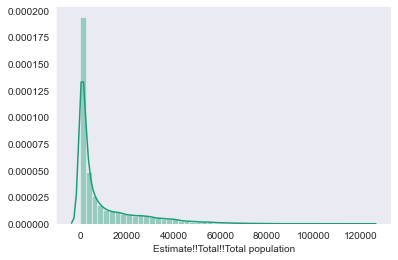

In [2435]:
sns.distplot(data['Estimate!!Total!!Total population'])

In [2436]:
total_pop = data['Estimate!!Total!!Total population']

In [2437]:
data_percents = data.filter(regex='Percent')

In [2438]:
# Concatenate total population back to data percents
data_percents['total_pop'] = total_pop

In [2439]:
# replace '-' with NaN
data_percents = data_percents.replace({'-': np.nan})

In [2440]:
# Drop columns with all nans

data_percents.dropna(axis=1, how='all', inplace=True)

In [2441]:
# Change all data_percents columns to floats
for i in data_percents.columns:
    try:
        data_percents[i] = data_percents[i].astype(float)
    except:
        continue


In [2442]:
list(real_estate_2019.columns)

['Five-Digit ZIP Code',
 'Year',
 'Annual Change (%)',
 'HPI',
 'HPI with 1990 base',
 'HPI with 2000 base']

In [2443]:
# Delete columns in data that are not floats
data_percents = data_percents.select_dtypes(exclude=['object'])

#### Edit real estate dataset

In [2444]:
real_estate_2019.rename(columns={'Five-Digit ZIP Code': 'zip'}, inplace=True)

In [2445]:
real_estate_2019 = real_estate_2019[['zip', 'Annual Change (%)', 'HPI']]

In [2446]:
# Set zip as index
real_estate_2019.set_index('zip', inplace=True)

In [2447]:
# Rename Annual Change(%) 
real_estate_2019.rename(columns={'Annual Change (%)': 'HPI_%_Annual_Change'}, inplace=True)

#### Edit Demographic Characteristics Percent dataset

In [2448]:
# replace '-' with NaN
dem_char_percents = dem_char_percents.replace({'-': np.nan})

In [2449]:
# Change all dem_char_percents columns to floats
for i in dem_char_percents.columns:
    try:
        dem_char_percents[i] = dem_char_percents[i].astype(float)
    except:
        continue

In [2450]:
dem_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 2017 or later':'Percent_Moved_In_2017_Plus'}, inplace=True)
dem_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 2015 to 2016':'Percent_Moved_In_2015_2016'}, inplace=True)
dem_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 2010 to 2014':'Percent_Moved_In_2010_2014'}, inplace=True)
dem_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 2000 to 2009':'Percent_Moved_In_2000_2009'}, inplace=True)
dem_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 1990 to 1999':'Percent_Moved_In_1990_1999'}, inplace=True)
dem_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Moved in 1989 or earlier':'Percent_Moved_In_1989_Prior'}, inplace=True)


In [2451]:
dem_char_percents = dem_char_percents[['Percent_Moved_In_2017_Plus', 'Percent_Moved_In_2015_2016', 'Percent_Moved_In_2010_2014', 'Percent_Moved_In_2000_2009', 'Percent_Moved_In_1990_1999', 'Percent_Moved_In_1989_Prior']]

#### Edit education percents dataset

In [2453]:
# replace '-' with NaN
education_percents = education_percents.replace({'-': np.nan})

In [2454]:
# Change all education_percents columns to floats
for i in education_percents.columns:
    try:
        education_percents[i] = education_percents[i].astype(float)
    except:
        continue

In [2455]:
education_percents = education_percents[["Estimate!!Percent!!Population 25 years and over!!Bachelor's degree", 
                                         "Estimate!!Percent!!Population 25 years and over!!Graduate or professional degree", 
                                         "Estimate!!Percent!!Population 25 years and over!!High school graduate or higher", 
                                         "Estimate!!Percent!!Population 25 years and over!!Some college, no degree", 
                                         "Estimate!!Percent Male!!Population 25 years and over!!Bachelor's degree", 
                                         "Estimate!!Percent Female!!Population 25 years and over!!Bachelor's degree", 
                                         "Estimate!!Percent Male!!Population 25 years and over!!Graduate or professional degree", 
                                         "Estimate!!Percent Female!!Population 25 years and over!!Graduate or professional degree", 
                                         "Estimate!!Percent Male!!Population 25 years and over!!High school graduate or higher", 
                                         "Estimate!!Percent Female!!Population 25 years and over!!High school graduate or higher"]]

#### Edit housing char percents dataset

In [2456]:
housing_char_percents = housing_char_percents.replace({'-': np.nan})

In [2457]:
# Change all employment_percent columns to floats
for i in housing_char_percents.columns:
    try:
        housing_char_percents[i] = housing_char_percents[i].astype(float)
    except:
        continue

In [2458]:
# Rename housing columns
housing_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!UNITS IN STRUCTURE!!1, detached': 'Percent_SF_Houses_Det'}, inplace=True)
housing_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!UNITS IN STRUCTURE!!1, attached': 'Percent_SF_Houses_Att'}, inplace=True)
housing_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!UNITS IN STRUCTURE!!2 apartments': 'Percent_2F_Apts'}, inplace=True)
housing_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!UNITS IN STRUCTURE!!3 or 4 apartments': 'Percent_3_4F_Apts'}, inplace=True)
housing_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!UNITS IN STRUCTURE!!5 to 9 apartments':'Percent_5_9F_Apts'}, inplace=True)
housing_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!UNITS IN STRUCTURE!!10 or more apartments':'Percent_10_PlusF_Apts'}, inplace=True)
housing_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!UNITS IN STRUCTURE!!Mobile home or other type of housing':'Percent_Mobile_Home'}, inplace=True)
housing_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR STRUCTURE BUILT!!2014 or later':'Percent_Yr_Built_2014_Plus'}, inplace=True)
housing_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR STRUCTURE BUILT!!2010 to 2013':'Percent_Yr_Built_2010_2013'}, inplace=True)
housing_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR STRUCTURE BUILT!!2000 to 2009':'Percent_Yr_Built_2000_2009'}, inplace=True)
housing_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR STRUCTURE BUILT!!1980 to 1999':'Percent_Yr_Built_1980_1999'}, inplace=True)
housing_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR STRUCTURE BUILT!!1960 to 1979':'Percent_Yr_Built_1960_1979'}, inplace=True)
housing_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR STRUCTURE BUILT!!1940 to 1959':'Percent_Yr_Built_1940_1959'}, inplace=True)
housing_char_percents.rename(columns={'Estimate!!Percent occupied housing units!!Occupied housing units!!YEAR STRUCTURE BUILT!!1939 or earlier':'Percent_Yr_Built_1939_Prior'}, inplace=True)



In [2459]:
# Select housing columns

housing_char_percents = housing_char_percents[['Percent_SF_Houses_Det', 'Percent_SF_Houses_Att', 'Percent_2F_Apts', 'Percent_3_4F_Apts', 'Percent_5_9F_Apts', 'Percent_10_PlusF_Apts', 'Percent_Mobile_Home', 'Percent_Yr_Built_2014_Plus', 'Percent_Yr_Built_2010_2013', 'Percent_Yr_Built_2000_2009', 'Percent_Yr_Built_1980_1999', 'Percent_Yr_Built_1960_1979', 'Percent_Yr_Built_1940_1959', 'Percent_Yr_Built_1939_Prior']]

#### Edit employment percents dataset

In [2594]:
employment_percents = employment_percents.replace({'-': np.nan})

In [2595]:
# Change all employment_percent columns to floats
for i in employment_percents.columns:
    try:
        employment_percents[i] = employment_percents[i].astype(float)
    except:
        continue

In [2596]:
employment_percents.rename(columns={'Estimate!!Percent Families with own children under 18 years!!Families' : 'Percent_Families_With_Children'}, inplace=True)


In [2597]:
employment_percents['Percent_Families_With_Children'] = employment_percents['Percent_Families_With_Children']/employment_percents['Estimate!!Percent!!Families']*100

In [2598]:
employment_percents = employment_percents[['Percent_Families_With_Children','Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force',
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force',
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present',
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present!!In labor force', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present!!In labor force', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present',  
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!In labor force', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!In labor force', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!Not in labor force', 
'Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!1 worker in the past 12 months', 
'Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!2 or more workers in the past 12 months',
'Estimate!!Percent Families with own children under 18 years!!WORK STATUS CHARACTERISTICS!!Families!!No workers in the past 12 months', 
'Estimate!!Percent Families with own children under 18 years!!WORK STATUS CHARACTERISTICS!!Families!!1 worker in the past 12 months', 
'Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!No workers in the past 12 months']]


In [2599]:
list(employment_percents.columns)

['Percent_Families_With_Children',
 'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force',
 'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force',
 'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force',
 'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force',
 'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force',
 'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force',
 'Estim

#### Edit veteran percents dataset

In [ ]:
Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families

In [2465]:
veteran_percents = veteran_percents.replace({'-': np.nan})

In [2466]:
# Change all veteran_percent columns to floats
for i in veteran_percents.columns:
    try:
        veteran_percents[i] = veteran_percents[i].astype(float)
    except:
        continue

In [2467]:
veteran_percents.rename(columns = {'Estimate!!Percent Veterans!!Civilian population 18 years and over' : 'Percent_Veterans'}, inplace=True)

In [2468]:
veteran_percents = veteran_percents[['Percent_Veterans']]

#### Edit worker class percents dataset

In [2469]:
worker_class_percents = worker_class_percents.replace({'-': np.nan})

In [2470]:
# Change all worker_class_percent columns to floats
for i in worker_class_percents.columns:
    try:
        worker_class_percents[i] = worker_class_percents[i].astype(float)
    except:
        continue

#### Edit marital percents dataset


In [2471]:
marital_percents = marital_percents.replace({'-': np.nan})

In [2472]:
# Change all marital_percent columns to floats
for i in marital_percents.columns:
    try:
        marital_percents[i] = marital_percents[i].astype(float)
    except:
        continue

####  Edit financial char percents dataset

In [2473]:
financial_char_percents = financial_char_percents.replace({'-': np.nan})

In [2474]:
# Change all financial_char_percent columns to floats
for i in financial_char_percents.columns:
    try:
        financial_char_percents[i] = financial_char_percents[i].astype(float)
    except:
        continue

In [2475]:
financial_char.rename(columns = {'Estimate!!Percent owner-occupied housing units!!Occupied housing units': 'Percent_Owner_Occupied'}, inplace=True)

In [2476]:
financial_char.rename(columns = {'Estimate!!Percent occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)' : 'Median_HH_Income'}, inplace=True)

In [2477]:
financial_char.rename(columns = {'Estimate!!Percent owner-occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)' : 'Median_Owner_HH_Income'}, inplace=True)

In [2478]:
financial_char.rename(columns = { 'Estimate!!Percent renter-occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)' : 'Median_Renter_HH_Income'}, inplace=True)

In [2479]:
financial_percents = financial_char[['Percent_Owner_Occupied', 'Median_HH_Income', 'Median_Owner_HH_Income', 'Median_Renter_HH_Income']]

In [2480]:
financial_percents['Percent_Owner_Occupied'] = financial_percents['Percent_Owner_Occupied']*100

#### Edit language percents dataset

In [2481]:

language_percents.rename(columns = {'Estimate!!Percent!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Spanish' : "Speaks_Spanish"}, inplace=True)

In [2482]:
language_percents.rename(columns = {'Estimate!!Percent!!Population 5 years and over!!Speak only English' : "Speak_Only_English"}, inplace=True)


In [2483]:
language_percents.rename(columns = {'Estimate!!Percent!!Population 5 years and over!!Speak a language other than English' : "Speaks_Other_Language"}, inplace=True)

In [2484]:
language_percents.rename(columns = {'Estimate!!Percent of specified language speakers!!Percent speak English less than very well"!!Population 5 years and over"' : "Poor_English_Speaking"}, inplace=True)

In [2485]:
# Select just three columns

language_percents = language_percents[['Speaks_Spanish', 'Speaks_Other_Language', 'Speak_Only_English', 'Poor_English_Speaking']]

In [2486]:
language_percents = language_percents.replace({'-': np.nan})

In [2487]:
# Change all languagepercent columns to floats
for i in language_percents.columns:
    try:
        language_percents[i] = language_percents[i].astype(float)
    except:
        continue

#### Edit transportation dataset

In [2488]:
# Rename columns

transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van' : 'Percent_Private_Vehicle'}, inplace=True)

In [2489]:
transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)' : 'Percent_Public_Trans'}, inplace=True)

In [2490]:
transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Walked' : 'Percent_Walked'}, inplace=True)

In [2491]:
transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked at home' :'Percent_Remote_Work'}, inplace=True)

In [2492]:
transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)': 'Mean_Commute_Time'}, inplace=True)
                                 

In [2493]:
transportation_percents = transportation[['Percent_Private_Vehicle', 'Percent_Public_Trans', 'Percent_Walked', 'Percent_Remote_Work', 'Mean_Commute_Time']]

In [2494]:
transportation_percents = transportation_percents.replace({'-': np.nan})

In [2495]:
transportation_percents = transportation_percents.replace({'N': np.nan})

In [2496]:
# Change all transportation_percent columns to floats
for i in transportation_percents.columns:
    try:
        transportation_percents[i] = transportation_percents[i].astype(float)
    except:
        continue

#### Edit Data Percents

In [2497]:
data_percents.rename(columns={'Estimate!!Percent!!Total population!!AGE!!Under 5 years' : 'Percent_Under_5'}, inplace=True)

In [2498]:
data_percents.rename(columns=  {'Estimate!!Percent!!Total population!!AGE!!5 to 9 years': 'Percent_5_to_9'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!10 to 14 years': 'Percent_10_to_14'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!15 to 19 years': 'Percent_15_to_19'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!20 to 24 years': 'Percent_20_to_24'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!25 to 29 years': 'Percent_25_to_29'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!30 to 34 years': 'Percent_30_to_34'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!35 to 39 years': 'Percent_35_to_39'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!40 to 44 years': 'Percent_40_to_44'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!45 to 49 years': 'Percent_45_to_49'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!50 to 54 years': 'Percent_50_to_54'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!55 to 59 years': 'Percent_55_to_59'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!60 to 64 years': 'Percent_60_to_64'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!65 to 69 years': 'Percent_65_to_69'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!70 to 74 years': 'Percent_70_to_74'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!75 to 79 years': 'Percent_75_to_79'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!80 to 84 years': 'Percent_80_to_84'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!85 years and over': 'Percent_85_Plus'}, inplace=True)


In [2499]:
data_percents = data_percents[['total_pop', 'Percent_Under_5', 'Percent_5_to_9', 
                               'Percent_10_to_14', 'Percent_15_to_19', 'Percent_20_to_24', 
                               'Percent_25_to_29', 'Percent_30_to_34', 'Percent_35_to_39', 
                               'Percent_40_to_44', 'Percent_45_to_49', 'Percent_50_to_54', 
                               'Percent_55_to_59', 'Percent_60_to_64', 'Percent_65_to_69', 
                               'Percent_70_to_74', 'Percent_75_to_79', 'Percent_80_to_84', 'Percent_85_Plus']]

#### Concatenate columns together based on 


In [2600]:
# Merge columns together
# Add density if you want later

final = pd.concat([data_percents, education_percents, employment_percents, language_percents, veteran_percents, transportation_percents, financial_percents, marital_percents, real_estate_2019, density, housing_char_percents, dem_char_percents], axis=1)

In [2601]:
# Fix the remaining object datatypes in the final. Cut down zip codes less than 2000
final['Mean_Commute_Time'] = final['Mean_Commute_Time'].astype(float)
final['Median_HH_Income'] = final['Median_HH_Income'].replace({'-': np.nan})
final['Median_HH_Income'] = final['Median_HH_Income'].replace({'2,500-': 2500.0})
final['Median_HH_Income'] = final['Median_HH_Income'].replace({'250,000+': 250000.0})
final['Median_HH_Income'] = final['Median_HH_Income'].astype(float)
final['Median_Owner_HH_Income'] = final['Median_Owner_HH_Income'].replace({'-': np.nan})
final['Median_Owner_HH_Income'] = final['Median_Owner_HH_Income'].replace({'2,500-': 2500.0})
final['Median_Owner_HH_Income'] = final['Median_Owner_HH_Income'].replace({'250,000+': 250000.0})
final['Median_Owner_HH_Income'] = final['Median_Owner_HH_Income'].astype(float)
final['HPI_%_Annual_Change'] = final['HPI_%_Annual_Change'].replace({'.': np.nan})
final['HPI_%_Annual_Change'] = final['HPI_%_Annual_Change'].astype(float)
final['Median_Renter_HH_Income'] = final['Median_Renter_HH_Income'].replace({'-': np.nan})
final['Median_Renter_HH_Income'] = final['Median_Renter_HH_Income'].replace({'2,500-': 2500.0})
final['Median_Renter_HH_Income'] = final['Median_Renter_HH_Income'].replace({'250,000+': 250000.0})
final['Median_Renter_HH_Income'] = final['Median_Renter_HH_Income'].astype(float)
final['HPI'] = final['HPI'].replace({'.': np.nan})
final['HPI'] = final['HPI'].astype(float)
# Drop zip codes with fewer than 2000 people
final = final[final['total_pop'] >= 2000]

In [2602]:
# Save to csv

final.to_csv('data/final.csv', index=False)

## EDA

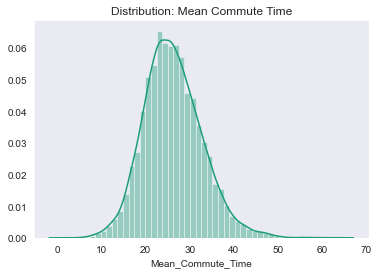

In [2179]:
ax = sns.distplot(final['Mean_Commute_Time'])
ax.set_title("Distribution: Mean Commute Time");

In [2180]:
final['Mean_Commute_Time'].describe()

count    18633.000000
mean     26.208571   
std      6.567243    
min      1.000000    
25%      21.700000   
50%      25.700000   
75%      30.300000   
max      64.200000   
Name: Mean_Commute_Time, dtype: float64

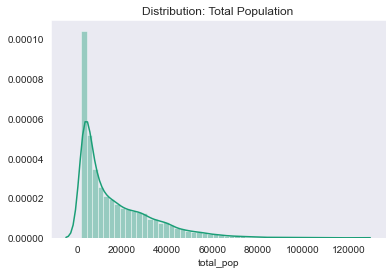

In [2181]:
ax = sns.distplot(final['total_pop'])
ax.set_title("Distribution: Total Population");

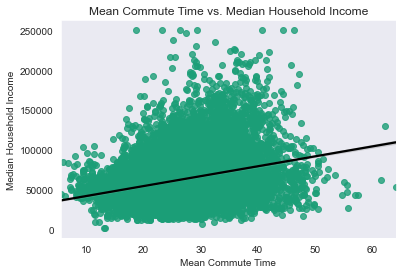

In [2182]:
sns.set_palette("Dark2")
sns.set_style("dark")
ax = sns.regplot(x='Mean_Commute_Time', 
                 y='Median_HH_Income', data=final, line_kws= {"color": 'black'})
ax.set_title("Mean Commute Time vs. Median Household Income")
ax.set_xlabel('Mean Commute Time')
ax.set_ylabel('Median Household Income');

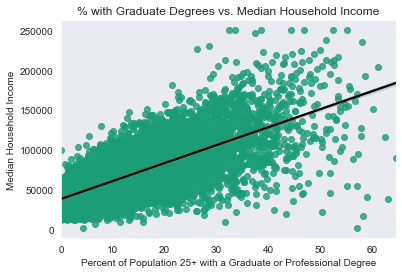

In [2183]:
ax = sns.regplot(x='Estimate!!Percent!!Population 25 years and over!!Graduate or professional degree', 
                 y='Median_HH_Income', data=final, line_kws= {"color": 'black'})
ax.set_title("% with Graduate Degrees vs. Median Household Income")
ax.set_xlabel('Percent of Population 25+ with a Graduate or Professional Degree')
ax.set_ylabel('Median Household Income');

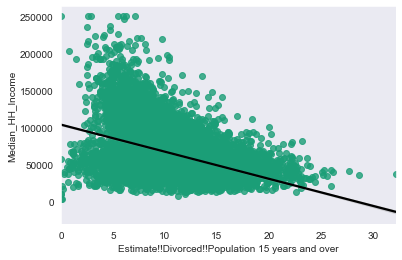

In [2184]:
ax = sns.regplot(x = 'Estimate!!Divorced!!Population 15 years and over', y='Median_HH_Income', data=final, line_kws= {"color": 'black'})


It appears that there is a negative correlation between Divorced Population and median household income

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


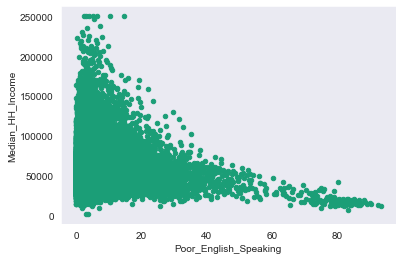

In [2185]:

ax = final.plot.scatter(x='Poor_English_Speaking', y= 'Median_HH_Income')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


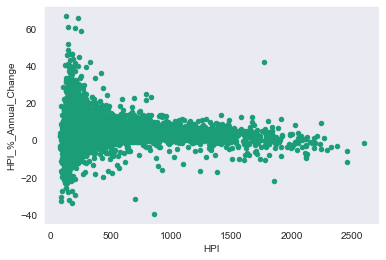

In [2186]:
ax = final.plot.scatter(x='HPI', y= 'HPI_%_Annual_Change')

### Deal with NaNs

Two options 1. Delete rows with missing values, 2. Impute values with missing values

In [2603]:
final_del_nans = final.copy()

In [2604]:
final_del_nans.shape

(18654, 92)

In [2547]:
#HPI_change = final_del_nans['HPI_%_Annual_Change']

In [2548]:
#final_del_nans.drop('HPI_%_Annual_Change', axis=1, inplace=True)

In [2605]:
final_del_nans.dropna(axis=0, how='any', inplace=True)

In [2606]:
final_del_nans.shape

(14633, 92)

In [2607]:
scaler = StandardScaler()
scaled = scaler.fit_transform(final_del_nans)

In [2608]:
scaled = pd.DataFrame(scaled, index=final_del_nans.index, columns=final_del_nans.columns)

In [2609]:
#similarity_matrix = linear_kernel(scaled, scaled)

In [2610]:
cosine_matrix = cosine_similarity(scaled, scaled)

In [2611]:
#euclidean_matrix = euclidean_distances(scaled, scaled)

In [2612]:

mapping = pd.Series(scaled.reset_index().index, index = scaled.index)

In [2557]:
# def recommend_zip_based_on_prev_zip(zip_input):
#     zip_index = int(mapping[zip_input])
#     #get similarity values with other zip codes
#     #similarity_score is the list of index and similarity matrix
#     similarity_score = list(enumerate(similarity_matrix[zip_index]))
#     #sort in descending order the similarity score of zip inputted with all the other zip codes
#     similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
#     # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
#     similarity_score = similarity_score[0:15]
#     #return zip codes using the mapping series
#     zip_indices = [i[0] for i in similarity_score]
#     best = []
#     for i in zip_indices:
#         best.append(final_del_nans.reset_index().iloc[i][0])
#     print(similarity_score)
#     return best

In [2613]:
def cosine_recommend_zip(zip_input, num=10, city=None, state=None):
    zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')
    zip_index = int(mapping[zip_input])
    #get similarity values with other zip codes
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(cosine_matrix[zip_index]))
    #sort in descending order the similarity score of zip inputted with all the other zip codes
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
    #return zip codes using the mapping series
    zip_indices = [i[0] for i in similarity_score]
    #similarity_score = similarity_score[1:num+1]
    best = []
    for i in zip_indices:
        best.append(int(final_del_nans.reset_index().iloc[i][0]))
    df = pd.DataFrame(data = best, columns = ['Zip'])
    merged = pd.merge(df,zip_location,on='Zip',how='inner')
    merged = merged[['Zip', 'City', 'State']]
    if city==None:
        if state==None:
            return merged[1:num+1]
        else:
            merged = merged[merged['State']==state]
            return merged[0:num]
    else:
        if state==None:
            print('You must enter a state with a city.')
        else:
            merged = merged[merged['State']==state]
            merged = merged[merged['City']==city]
            return merged[0:num]
    
  


In [2559]:
# def euclidean_recommend_zip(zip_input):
#     zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')
#     zip_index = int(mapping[zip_input])
#     #get similarity values with other zip codes
#     #similarity_score is the list of index and similarity matrix
#     similarity_score = list(enumerate(euclidean_matrix[zip_index]))
#     #sort in descending order the similarity score of zip inputted with all the other zip codes
#     similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
#     # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
#     similarity_score = similarity_score[1:20]
#     #return zip codes using the mapping series
#     zip_indices = [i[0] for i in similarity_score]
#     best = []
#     for i in zip_indices:
#         best.append(int(final_del_nans.reset_index().iloc[i][0]))
#     df = pd.DataFrame(data = best, columns = ['Zip'])
#     merged = pd.merge(df,zip_location,on='Zip',how='inner')
#     merged = merged[['Zip', 'City', 'State']]
#     return merged

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
cosine_recommend_zip('98006', 10, city=None, state='MA')

#### Map zip codes to cities

In [2140]:
zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')

#### What happens to the model if we remove features?

#### Remove total population

In [1793]:
final_no_pop = final_del_nans.drop('total_pop', axis=1)

In [1794]:
scaler = StandardScaler()
scaled = scaler.fit_transform(final_no_pop)


In [1795]:
scaled = pd.DataFrame(scaled, index=final_no_pop.index, columns=final_no_pop.columns)

In [1796]:
cosine_matrix = cosine_similarity(scaled, scaled)
mapping = pd.Series(scaled.reset_index().index, index = scaled.index)

In [1797]:
def cosine_recommend_zip(zip_input):
    zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')
    zip_index = int(mapping[zip_input])
    #get similarity values with other zip codes
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(cosine_matrix[zip_index]))
    #sort in descending order the similarity score of zip inputted with all the other zip codes
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
    similarity_score = similarity_score[1:11]
    #return zip codes using the mapping series
    zip_indices = [i[0] for i in similarity_score]
    best = []
    for i in zip_indices:
        best.append(int(final_no_pop.reset_index().iloc[i][0]))
    df = pd.DataFrame(data = best, columns = ['Zip'])
    merged = pd.merge(df,zip_location,on='Zip',how='inner')
    merged = merged[['Zip', 'City', 'State']]
    return merged

In [1798]:
cosine_recommend_zip('02130')

,Zip,City,State
0,2140,Cambridge,MA
1,20010,Washington,DC
2,7302,Jersey City,NJ
3,20009,Washington,DC
4,20002,Washington,DC
5,60622,Chicago,IL
6,60640,Chicago,IL
7,2144,Somerville,MA
8,7086,Union City,NJ
9,60614,Chicago,IL


There was no change in the top 10 for Needham, MA 02492. For Dallas, 75205, there was no change in the top 4. The order of recommendations changes slightly after that, but the top 10 still consists of the same recommendations. For Woodinville, WA 98072 there was a slight change in order between the last two in the top 10, but otherwise the recommendations stayed the same. By including 40006, a smaller, less affluent town in Kentucky, we see that the impacts are also minimal. 02130 Jamaica Plain Boston just had a slight shift on the lower part of the top 10 recommendations.

### How does HH income impact? Remove median HH income (overall) and median HH income for owners and renters 

In [1799]:
final_no_income = final_del_nans.drop('Median_HH_Income', axis=1)
final_no_income = final_no_income.drop('Median_Owner_HH_Income', axis=1)
final_no_income = final_no_income.drop('Median_Renter_HH_Income', axis=1)

In [1800]:
scaler = StandardScaler()
scaled = scaler.fit_transform(final_no_income)
scaled = pd.DataFrame(scaled, index=final_no_income.index, columns=final_no_income.columns)
cosine_matrix = cosine_similarity(scaled, scaled)
mapping = pd.Series(scaled.reset_index().index, index = scaled.index)

In [1801]:
def cosine_recommend_zip(zip_input):
    zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')
    zip_index = int(mapping[zip_input])
    #get similarity values with other zip codes
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(cosine_matrix[zip_index]))
    #sort in descending order the similarity score of zip inputted with all the other zip codes
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
    similarity_score = similarity_score[1:11]
    #return zip codes using the mapping series
    zip_indices = [i[0] for i in similarity_score]
    best = []
    for i in zip_indices:
        best.append(int(final_no_income.reset_index().iloc[i][0]))
    df = pd.DataFrame(data = best, columns = ['Zip'])
    merged = pd.merge(df,zip_location,on='Zip',how='inner')
    merged = merged[['Zip', 'City', 'State']]
    return merged

In [1802]:
cosine_recommend_zip('02130')

,Zip,City,State
0,2140,Cambridge,MA
1,7302,Jersey City,NJ
2,20010,Washington,DC
3,20009,Washington,DC
4,60640,Chicago,IL
5,20002,Washington,DC
6,60622,Chicago,IL
7,60614,Chicago,IL
8,2144,Somerville,MA
9,7086,Union City,NJ


Like total population, removing household income from the recommender had little impact on the recommendations. For Woodinville, 98072, the top 4 remained in the same place. The top 10 had all of the same recommendations except for one; what was number 11 in the original recommender jumped up to the 7th spot after removing income. For 75205 Dallas, 1 & 2 switched places. Most notably, 5 in the original dropped to 12. Looking at 40006, Bedford, KY, we also see minimal impact. 02130 Jamaica Plain Boston just had a slight shift in order.

#### Remove HPI to see impact

In [1803]:
final_no_HPI = final_del_nans.drop('HPI', axis=1)
scaler = StandardScaler()
scaled = scaler.fit_transform(final_no_HPI)
scaled = pd.DataFrame(scaled, index=final_no_HPI.index, columns=final_no_HPI.columns)
cosine_matrix = cosine_similarity(scaled, scaled)
mapping = pd.Series(scaled.reset_index().index, index = scaled.index)

In [1804]:
def cosine_recommend_zip(zip_input):
    zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')
    zip_index = int(mapping[zip_input])
    #get similarity values with other zip codes
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(cosine_matrix[zip_index]))
    #sort in descending order the similarity score of zip inputted with all the other zip codes
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
    similarity_score = similarity_score[1:11]
    #return zip codes using the mapping series
    zip_indices = [i[0] for i in similarity_score]
    best = []
    for i in zip_indices:
        best.append(int(final_no_HPI.reset_index().iloc[i][0]))
    df = pd.DataFrame(data = best, columns = ['Zip'])
    merged = pd.merge(df,zip_location,on='Zip',how='inner')
    merged = merged[['Zip', 'City', 'State']]
    return merged

In [1806]:
print('Recommender without HPI')
cosine_recommend_zip('02130')

Recommender without HPI


,Zip,City,State
0,2140,Cambridge,MA
1,20010,Washington,DC
2,7302,Jersey City,NJ
3,20002,Washington,DC
4,20009,Washington,DC
5,94703,Berkeley,CA
6,60622,Chicago,IL
7,60640,Chicago,IL
8,2144,Somerville,MA
9,60614,Chicago,IL


For 75205 Dallas, a zip code with a very high HPI, the top 4 remained the same. 5 moved down to 6 and was replaced with Little Rock, AR, which previously was not in the top 10 (only in the top 20). This is likely because this area of Little Rock has a much lower HPI. There is nearly no impact on 40006 Bedford KY, a zip code with a low HPI. Needham 02492 had minimal impact as well. 02130 Jamaica Plain Boston had little impact as well, although Berkeley, CA now moved into the top 10 at the expense of Union City, NJ.

#### Remove Education Characteristics

In [1813]:
# Merge columns together
# Add density if you want later

final_no_edu = pd.concat([data_percents, employment_percents, language_percents, veteran_percents, transportation_percents, financial_percents, marital_percents, real_estate_2019], axis=1)


In [1814]:
final_no_edu['Median_HH_Income'] = final_no_edu['Median_HH_Income'].replace({'-': np.nan})
final_no_edu['Median_HH_Income'] = final_no_edu['Median_HH_Income'].replace({'2,500-': 2500.0})
final_no_edu['Median_HH_Income'] = final_no_edu['Median_HH_Income'].replace({'250,000+': 250000.0})
final_no_edu['Median_HH_Income'] = final_no_edu['Median_HH_Income'].astype(float)
final_no_edu['Median_Owner_HH_Income'] = final_no_edu['Median_Owner_HH_Income'].replace({'-': np.nan})
final_no_edu['Median_Owner_HH_Income'] = final_no_edu['Median_Owner_HH_Income'].replace({'2,500-': 2500.0})
final_no_edu['Median_Owner_HH_Income'] = final_no_edu['Median_Owner_HH_Income'].replace({'250,000+': 250000.0})
final_no_edu['Median_Owner_HH_Income'] = final_no_edu['Median_Owner_HH_Income'].astype(float)
final_no_edu['HPI_%_Annual_Change'] = final_no_edu['HPI_%_Annual_Change'].replace({'.': np.nan})
final_no_edu['HPI_%_Annual_Change'] = final_no_edu['HPI_%_Annual_Change'].astype(float)
final_no_edu['Median_Renter_HH_Income'] = final_no_edu['Median_Renter_HH_Income'].replace({'-': np.nan})
final_no_edu['Median_Renter_HH_Income'] = final_no_edu['Median_Renter_HH_Income'].replace({'2,500-': 2500.0})
final_no_edu['Median_Renter_HH_Income'] = final_no_edu['Median_Renter_HH_Income'].replace({'250,000+': 250000.0})
final_no_edu['Median_Renter_HH_Income'] = final_no_edu['Median_Renter_HH_Income'].astype(float)
final_no_edu['HPI'] = final_no_edu['HPI'].replace({'.': np.nan})
final_no_edu['HPI'] = final_no_edu['HPI'].astype(float)
# Drop zip codes with fewer than 2000 people
final_no_edu = final_no_edu[final_no_edu['total_pop'] >= 2000]

In [1815]:
final_no_edu.dropna(axis=0, how='any', inplace=True)

In [1854]:
scaler = StandardScaler()
scaled = scaler.fit_transform(final_no_edu)
scaled = pd.DataFrame(scaled, index=final_no_edu.index, columns=final_no_edu.columns)
cosine_matrix = cosine_similarity(scaled, scaled)
mapping = pd.Series(scaled.reset_index().index, index = scaled.index)

In [1855]:
def cosine_recommend_zip(zip_input):
    zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')
    zip_index = int(mapping[zip_input])
    #get similarity values with other zip codes
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(cosine_matrix[zip_index]))
    #sort in descending order the similarity score of zip inputted with all the other zip codes
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
    similarity_score = similarity_score[1:11]
    #return zip codes using the mapping series
    zip_indices = [i[0] for i in similarity_score]
    best = []
    for i in zip_indices:
        best.append(int(final_no_edu.reset_index().iloc[i][0]))
    df = pd.DataFrame(data = best, columns = ['Zip'])
    merged = pd.merge(df,zip_location,on='Zip',how='inner')
    merged = merged[['Zip', 'City', 'State']]
    return merged

In [1856]:
cosine_recommend_zip('40006')

,Zip,City,State
0,36726,Camden,AL
1,30233,Jackson,GA
2,98596,Winlock,WA
3,24301,Pulaski,VA
4,39571,Pass Christian,MS
5,39111,Magee,MS
6,36545,Jackson,AL
7,29536,Dillon,SC
8,36862,Lafayette,AL
9,38478,Pulaski,TN


Removing education columns caused one new zip code to hit the top 10 for Jamaica Plain. 75205 Dallas had a shift around the top 4, and some new additions to the top 10. Woodinville 98072 had a few new additions to the top 10 as well. Removing education had a slightly bigger impact on 40006 Bedford KY; Winlock, WA took the 3rd spot and was not in the top 10 at all before.

#### Remove Employment Characteristics

In [1857]:
final_no_emp = pd.concat([data_percents, education_percents, language_percents, veteran_percents, transportation_percents, financial_percents, marital_percents, real_estate_2019], axis=1)


In [1858]:
final_no_emp['Median_HH_Income'] = final_no_emp['Median_HH_Income'].replace({'-': np.nan})
final_no_emp['Median_HH_Income'] = final_no_emp['Median_HH_Income'].replace({'2,500-': 2500.0})
final_no_emp['Median_HH_Income'] = final_no_emp['Median_HH_Income'].replace({'250,000+': 250000.0})
final_no_emp['Median_HH_Income'] = final_no_emp['Median_HH_Income'].astype(float)
final_no_emp['Median_Owner_HH_Income'] = final_no_emp['Median_Owner_HH_Income'].replace({'-': np.nan})
final_no_emp['Median_Owner_HH_Income'] = final_no_emp['Median_Owner_HH_Income'].replace({'2,500-': 2500.0})
final_no_emp['Median_Owner_HH_Income'] = final_no_emp['Median_Owner_HH_Income'].replace({'250,000+': 250000.0})
final_no_emp['Median_Owner_HH_Income'] = final_no_emp['Median_Owner_HH_Income'].astype(float)
final_no_emp['HPI_%_Annual_Change'] = final_no_emp['HPI_%_Annual_Change'].replace({'.': np.nan})
final_no_emp['HPI_%_Annual_Change'] = final_no_emp['HPI_%_Annual_Change'].astype(float)
final_no_emp['Median_Renter_HH_Income'] = final_no_emp['Median_Renter_HH_Income'].replace({'-': np.nan})
final_no_emp['Median_Renter_HH_Income'] = final_no_emp['Median_Renter_HH_Income'].replace({'2,500-': 2500.0})
final_no_emp['Median_Renter_HH_Income'] = final_no_emp['Median_Renter_HH_Income'].replace({'250,000+': 250000.0})
final_no_emp['Median_Renter_HH_Income'] = final_no_emp['Median_Renter_HH_Income'].astype(float)
final_no_emp['HPI'] = final_no_emp['HPI'].replace({'.': np.nan})
final_no_emp['HPI'] = final_no_emp['HPI'].astype(float)
# Drop zip codes with fewer than 2000 people
final_no_emp = final_no_emp[final_no_emp['total_pop'] >= 2000]

In [1859]:
final_no_emp.dropna(axis=0, how='any', inplace=True)

In [1908]:
scaler = StandardScaler()
scaled = scaler.fit_transform(final_no_emp)
scaled = pd.DataFrame(scaled, index=final_no_emp.index, columns=final_no_emp.columns)
cosine_matrix = cosine_similarity(scaled, scaled)
mapping = pd.Series(scaled.reset_index().index, index = scaled.index)

In [1909]:
def cosine_recommend_zip(zip_input):
    zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')
    zip_index = int(mapping[zip_input])
    #get similarity values with other zip codes
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(cosine_matrix[zip_index]))
    #sort in descending order the similarity score of zip inputted with all the other zip codes
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
    similarity_score = similarity_score[1:11]
    #return zip codes using the mapping series
    zip_indices = [i[0] for i in similarity_score]
    best = []
    for i in zip_indices:
        best.append(int(final_no_emp.reset_index().iloc[i][0]))
    df = pd.DataFrame(data = best, columns = ['Zip'])
    merged = pd.merge(df,zip_location,on='Zip',how='inner')
    merged = merged[['Zip', 'City', 'State']]
    return merged

Removing employment features pushed Wayne PA up to 3 for 75205 Dallas. Andover, MA and Davidson, NC are now in the top 10. Lakewood, CO and Birmingham, MI are removed. Woodinville 98072 was not impacted too significantly, although the top spot in the original recommender (Newbury Park, CA) is now the 10th spot. 40006 Bedford KY was impacted significantly by removing employment features. Only 1 of the top 10 from the original recommender remained after removing employment. 02130 was moderately impacted with several recommendations switching spots and a few new recommendations in the top 10.

In [2271]:
# TO DO: Come up with several scenarios and what you expect results to be then test them out with various features removed

In [ ]:
# TO DO: I think the housing characteristics hurt my model. 
#Maybe take out the age built columns because that will impact the results.
# But first come up with scenarios, leave as is for now and test the scenarios.
# Maybe need to come up with filter first

In [ ]:
# SCENARIO 1: Highland Park, TX to Boston, MA, Highland Park, TX to Seattle, WA
# Boston towns: Wellesley, Newton, Lexington
# Seattle towns: Magnolia? Mercer Island, Bellevue

In [2582]:
final.reset_index()[final.reset_index()['index'] == '98072']

,index,total_pop,Percent_Under_5,Percent_5_to_9,Percent_10_to_14,Percent_15_to_19,Percent_20_to_24,Percent_25_to_29,Percent_30_to_34,Percent_35_to_39,Percent_40_to_44,Percent_45_to_49,Percent_50_to_54,Percent_55_to_59,Percent_60_to_64,Percent_65_to_69,Percent_70_to_74,Percent_75_to_79,Percent_80_to_84,Percent_85_Plus,Estimate!!Percent!!Population 25 years and over!!Bachelor's degree,Estimate!!Percent!!Population 25 years and over!!Graduate or professional degree,Estimate!!Percent!!Population 25 years and over!!High school graduate or higher,"Estimate!!Percent!!Population 25 years and over!!Some college, no degree",Estimate!!Percent Male!!Population 25 years and over!!Bachelor's degree,Estimate!!Percent Female!!Population 25 years and over!!Bachelor's degree,Estimate!!Percent Male!!Population 25 years and over!!Graduate or professional degree,Estimate!!Percent Female!!Population 25 years and over!!Graduate or professional degree,Estimate!!Percent Male!!Population 25 years and over!!High school graduate or higher,Estimate!!Percent Female!!Population 25 years and over!!High school graduate or higher,Percent_Families_With_Children,"Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force","Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force","Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force","Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force",Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force,Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force,Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families,Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families,"Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present","Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present","Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present!!In labor force","Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present!!In labor force","Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present","Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present","Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!In labor force","Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!In labor force","Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!Not in labor force",Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!1 worker in the past 12 months,Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!2 or more workers in the past 12 months,Estimate!!Percent Families with own children under 18 years!!WORK STATUS CHARACTERISTICS!!Families!!No workers in the past 12 months,Estimate!!Percent Families with own children under 18 years!!WORK STATUS CHAR

In [2584]:
list(final.columns)

['total_pop',
 'Percent_Under_5',
 'Percent_5_to_9',
 'Percent_10_to_14',
 'Percent_15_to_19',
 'Percent_20_to_24',
 'Percent_25_to_29',
 'Percent_30_to_34',
 'Percent_35_to_39',
 'Percent_40_to_44',
 'Percent_45_to_49',
 'Percent_50_to_54',
 'Percent_55_to_59',
 'Percent_60_to_64',
 'Percent_65_to_69',
 'Percent_70_to_74',
 'Percent_75_to_79',
 'Percent_80_to_84',
 'Percent_85_Plus',
 "Estimate!!Percent!!Population 25 years and over!!Bachelor's degree",
 'Estimate!!Percent!!Population 25 years and over!!Graduate or professional degree',
 'Estimate!!Percent!!Population 25 years and over!!High school graduate or higher',
 'Estimate!!Percent!!Population 25 years and over!!Some college, no degree',
 "Estimate!!Percent Male!!Population 25 years and over!!Bachelor's degree",
 "Estimate!!Percent Female!!Population 25 years and over!!Bachelor's degree",
 'Estimate!!Percent Male!!Population 25 years and over!!Graduate or professional degree',
 'Estimate!!Percent Female!!Population 25 years and